In [57]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(RColorBrewer)

In [49]:
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Questions☝️

In this project, I will address this broad question: **Which "kinds" of players are most likely to contribute a large amount of data?**

Specifically, my question is: **Can a user's age and experience predict their gaming frequency, as determined by the number of sessions?**

In [50]:
# converting the columns 'experience' and 'gender' in players.csv to factors
players <- players |> mutate(across(c("experience", "gender"), as.factor))

# rename certain columns so that all follow the same convention
players <- players |> rename(age = Age) |> rename(hashed_email = hashedEmail)
sessions <- sessions |> rename(hashed_email = hashedEmail)

In [51]:
# reporting the means for quantitative variables in players.csv,
# which includes 'played_hours' and 'age'

mean_hours <- mean(players$played_hours, na.rm = TRUE)
mean_age <- mean(players$age, na.rm = TRUE)

mean_tbl <- tibble(
    mean_hours = mean_hours,
    mean_age = mean_age
)

mean_tbl

mean_hours,mean_age
<dbl>,<dbl>
5.845918,21.13918


In [52]:
# getting the number of sessions each player has, appending to players.csv as
# a new column

sess_count <- sessions |> 
    group_by(hashed_email) |>
    summarize(sess_count = n())

players <- players |>
    left_join(sess_count, by = "hashed_email") |> 
    mutate(sess_count = replace_na(sess_count, 0))

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


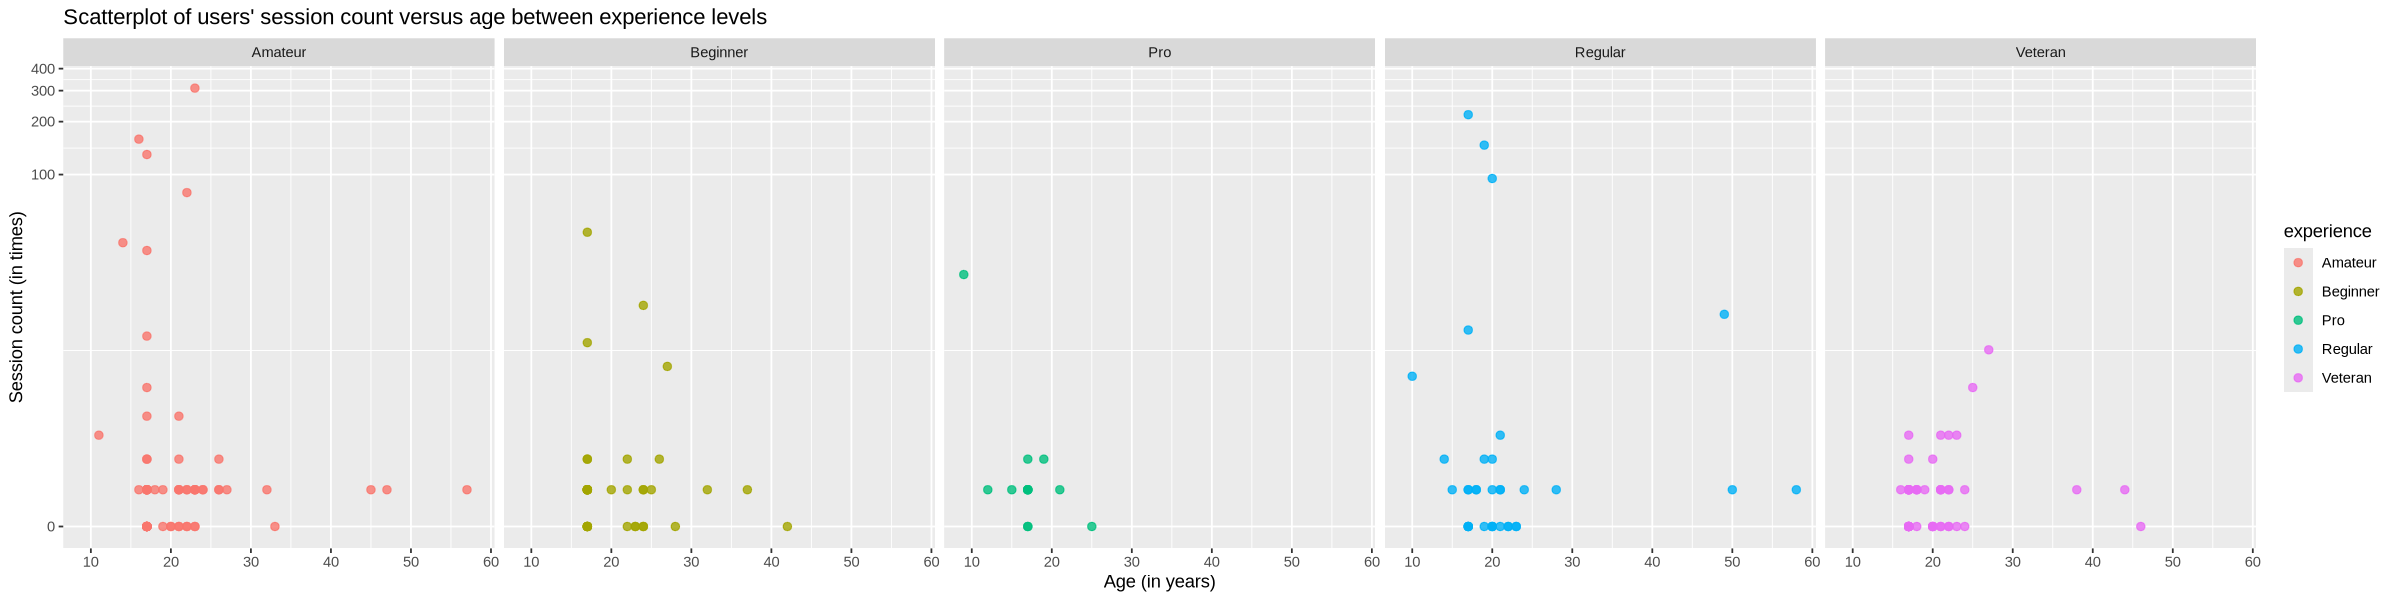

In [85]:
# scatterplot of users' session count by age and experience level
options(repr.plot.width=20, repr.plot.height=5)
age_plot <- players |>
    ggplot(aes(x = age, y = sess_count, color = experience)) +
    geom_point(alpha = 0.8, size = 2) +
    labs(title = "Scatterplot of users' session count versus age between experience levels",
         x = "Age (in years)",
         y = "Session count (in times)") +
    scale_y_continuous(trans = pseudo_log_trans(base = 10)) +
    scale_fill_brewer(palette = 'Spectral') +
    facet_wrap(~ experience, nrow = 1)

age_plot